In [1]:
!pip install fastai -q --upgrade

In [2]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 42.2 MB/s eta 0:00:00


In [9]:
from fastai.vision.all import *
from pathlib import Path
from fastcore.xtras import Path # @patched Pathlib.path
import timm

In [6]:
path = Path('./datasets/starwars')
Path.BASE_PATH = path

In [7]:
starwars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(size=460, method='RandomCrop'),
    batch_tfms=aug_transforms(size=224))

In [8]:
dls = starwars.dataloaders(path)

In [10]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [11]:
learn = vision_learner(dls, 'convnext_base_384_in22ft1k', metrics=error_rate)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_base_22k_1k_384.pth" to /root/.cache/torch/hub/checkpoints/convnext_base_22k_1k_384.pth


SuggestedLRs(valley=0.0008317637839354575)

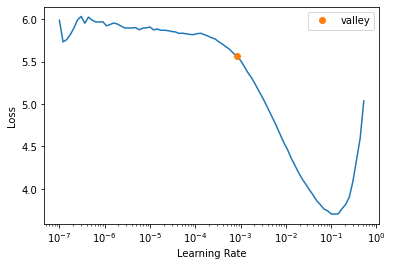

In [12]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,3.021097,0.896803,0.244444,00:35
1,1.438858,0.537798,0.144974,00:36
2,0.842871,0.496107,0.132275,00:36


In [14]:
learn.unfreeze()

SuggestedLRs(valley=0.00010964782268274575)

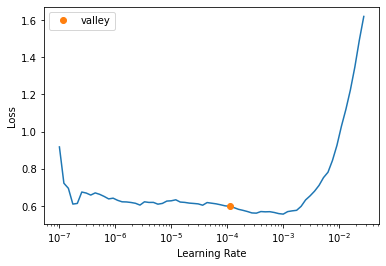

In [15]:
learn.lr_find()

In [16]:
learn.fit_one_cycle(8, lr_max=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.591653,0.438518,0.122751,01:11
1,0.519138,0.414243,0.103704,01:11
2,0.422640,0.354896,0.097354,01:12
3,0.326535,0.351420,0.095238,01:11
4,0.251399,0.322475,0.088889,01:10
5,0.197099,0.318513,0.081481,01:11
6,0.167268,0.306572,0.083598,01:11
7,0.140334,0.304790,0.081481,01:12


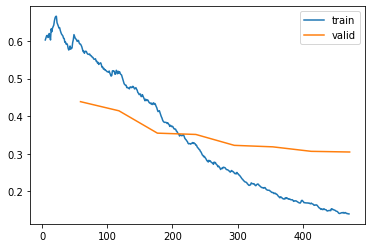

In [17]:
learn.recorder.plot_loss()

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

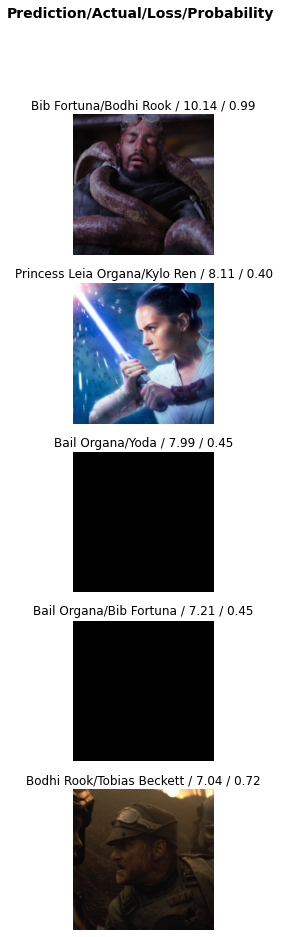

In [19]:
interp.plot_top_losses(5, nrows=5)

In [21]:
learn.export(fname='./star_wars_model_03.pkl', pickle_module=pickle, pickle_protocol=2)